### Importando os modulos que serão utilizados para facilitar a análise dos dados

In [189]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

from pathlib import Path
from re import compile as cp
from calendar import month_abbr
from os import mkdir, path


### Cria a pasta Médias e a pasta Figuras para poderem ser salvos os resultados obtidos

In [190]:
if not path.exists('dados/tidi/medias'):
    mkdir('dados/tidi/medias')
    mkdir('dados/tidi/figuras')

### Cria uma lista de todos os arquivos dentro da pasta passada dentro do Path('.')(Para mudar de pasta, só mudar o '.', pelo nome da pasta. Ex: Path('casa'))

In [191]:
dir_ventos = ['zonal', 'meridional']
caminhos = [ Path('dados/tidi/dados_'+path+'/') for path in dir_ventos]
arquivos = sorted([i for caminho in caminhos for i in caminho.glob('*.txt')])


In [192]:
arquivos

[WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_001.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_002.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_003.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_004.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_005.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_006.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_007.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_008.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_009.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_010.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_011.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_012.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_013.txt'),

### Procura pelo ano e mês dentro do nome do arquivo. Util para saber qual mês está sendo trabalhado e de qual ano

In [193]:
compilado = cp('[a-z]|[A-Z]')
ano = cp('\d\d\d\d')

# Ler os dados, calcula a média e salva na pasta médias

In [194]:
dict_months = {
    '01': [1, 31],
    '02': [32, 59],
    '03': [60, 90],
    '04': [91, 120],
    '05': [121, 151],
    '06': [152, 181],
    '07': [182, 212],
    '08': [213, 243],
    '09': [244, 273],
    '10': [274, 304],
    '11': [305, 334],
    '12': [335, 365],
}

dict_day_to_month = { i:k  for k,v in zip(dict_months.keys(), dict_months.values()) for i in range(v[0], v[1]+1)}

In [195]:
dict_day_to_month[2]

'01'

In [196]:
ucolunas = ['tempo_decorrido', '80.0km', '82.5km', '85.0km', '87.5km', '90.0km', '92.5km', '95.0km', '97.5km', '100.0km']

cabe = ['tempo', '80', '82.5', '85', '87.5', '90', '92.5', '95', '97.5', '100']

In [197]:
df = pd.read_csv(arquivos[2], sep=';', usecols=ucolunas)

In [198]:
df.sort_values(by='tempo_decorrido', inplace=True)

In [199]:
df.dropna(subset=ucolunas[1:], how='all', axis=0, inplace=True)

In [200]:
df['tempo_decorrido'] = df['tempo_decorrido'].apply(lambda x: round(x, 2))

In [207]:
df

tempo_decorrido     80.0km     82.5km     85.0km     87.5km     90.0km  \
0              4.83        NaN        NaN        NaN   8.189807  -6.600556   
1              4.86        NaN        NaN        NaN   8.658923  -6.288739   
23            15.26  14.285598  -2.166093 -15.633289 -19.300140   2.814913   
19            15.26  -9.322081  -4.280995   8.885908  20.360083  35.172690   
11            15.26  10.661430 -20.503820 -34.855270 -35.164000 -12.971382   
3             18.53        NaN -32.639442 -46.407085 -40.385704 -16.076908   
18            18.53  32.546616  21.720797  22.738453  33.059162  49.932480   
10            18.53        NaN -38.394978 -33.335180 -18.810741   5.447557   
2             18.57        NaN -26.696266 -34.347015 -45.025513 -45.906200   
9             18.57        NaN -35.274050 -26.062838 -23.780495 -25.688452   
17            18.57  38.996680  22.756012  12.806939  11.658756   9.467282   

       92.5km     95.0km     97.5km     100.0km  
0    7.089781 -27.656727 -91.775630 -149.741330  
1  -14.778603 -56.812958 -54.379723  -70.323550  
23  38.905000  54.599586  44.619663   17.657660  
19  54.685867  59.496246  61.203380   50.856050  
11  25.643692  55.606430  69.790500   66.583800  
3   39.025520  68.174460  40.521976  -11.998333  
18  32.449250   4.727799 -26.831654  -45.973717  
10  47.001144  91.580765  76.956320   31.500834  
2   27.793970  62.240936  20.563383  -24.233929  
9   34.550090  74.940544  37.488445  -12.194104  
17  17.348194  14.405596  -1.496586  -43.792020

In [202]:
indexes = df.drop_duplicates(subset='tempo_decorrido').reset_index(drop=True).index
df_ = pd.DataFrame(columns=df.columns, index=indexes)

In [203]:
df_.loc[0] = df[df.tempo_decorrido==15.26].mean()

In [204]:
df_

tempo_decorrido    80.0km    82.5km    85.0km     87.5km   90.0km  \
0           15.26  5.208316 -8.983636 -13.86755 -11.368019  8.33874   
1             NaN       NaN       NaN       NaN        NaN      NaN   
2             NaN       NaN       NaN       NaN        NaN      NaN   
3             NaN       NaN       NaN       NaN        NaN      NaN   
4             NaN       NaN       NaN       NaN        NaN      NaN   

      92.5km     95.0km     97.5km    100.0km  
0  39.744853  56.567421  58.537848  45.032503  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN

In [212]:
df[(df.tempo_decorrido>=15.26 - 0.5)&(df.tempo_decorrido <= 15.26 + 0.5)]

tempo_decorrido     80.0km     82.5km     85.0km     87.5km     90.0km  \
23            15.26  14.285598  -2.166093 -15.633289 -19.300140   2.814913   
19            15.26  -9.322081  -4.280995   8.885908  20.360083  35.172690   
11            15.26  10.661430 -20.503820 -34.855270 -35.164000 -12.971382   

       92.5km     95.0km     97.5km   100.0km  
23  38.905000  54.599586  44.619663  17.65766  
19  54.685867  59.496246  61.203380  50.85605  
11  25.643692  55.606430  69.790500  66.58380

In [161]:
df.drop_duplicates(subset='tempo_decorrido')['tempo_decorrido'].tolist()

[15.26, 18.53, 18.57]

In [224]:
def choose_first_day_month(dict_months, dict_day_to_month, arq):
    filename = str(arq)
    day = int(filename[-7:-4])
    month = dict_day_to_month[day]
    if day == dict_months[month][0]:
        return arq
    return None


def calculate_mean(df):
    tempos = df.drop_duplicates(subset='tempo_decorrido')['tempo_decorrido'].tolist()
    df_ = pd.DataFrame(columns=df.columns, index=range(len(tempos)))

    for i, tempo in enumerate(tempos):
        df_.loc[i] = df[(df.tempo_decorrido>=tempo - 0.5)&(df.tempo_decorrido<=tempo + 0.5)].mean()
    
    return df_

In [225]:
arquivos_primeiro_dia_mes = [choose_first_day_month(dict_months, dict_day_to_month, arq) for arq in arquivos if choose_first_day_month(dict_months, dict_day_to_month, arq)]

In [228]:
for i in arquivos_primeiro_dia_mes:
    print(i)
    nome_arquivo = str(i)

    df = pd.read_csv(i, sep=';', usecols=ucolunas)

    df.sort_values(by='tempo_decorrido', inplace=True)
    df.dropna(subset=ucolunas[1:], how='all', axis=0, inplace=True)
    df['tempo_decorrido'] = df['tempo_decorrido'].apply(lambda x: round(x, 4))

    df_ = calculate_mean(df)
    df_.columns = cabe
    df_.drop_duplicates(subset=cabe, inplace=True)
    
    if 'meridional' in nome_arquivo:
        nome_arquivo_final = nome_arquivo[28:51]
    else:
        nome_arquivo_final = nome_arquivo[23:41]

    df_.to_string(f'dados/tidi/medicoes_dias/'+nome_arquivo_final+'.txt', index=False)

dados\tidi\dados_meridional\dados_meridional_200501_001.txt
dados\tidi\dados_meridional\dados_meridional_200502_032.txt
dados\tidi\dados_meridional\dados_meridional_200503_060.txt
dados\tidi\dados_meridional\dados_meridional_200504_091.txt
dados\tidi\dados_meridional\dados_meridional_200505_121.txt
dados\tidi\dados_meridional\dados_meridional_200506_152.txt
dados\tidi\dados_meridional\dados_meridional_200507_182.txt
dados\tidi\dados_meridional\dados_meridional_200508_213.txt
dados\tidi\dados_meridional\dados_meridional_200509_244.txt
dados\tidi\dados_meridional\dados_meridional_200510_274.txt
dados\tidi\dados_meridional\dados_meridional_200511_305.txt
dados\tidi\dados_meridional\dados_meridional_200512_335.txt
dados\tidi\dados_meridional\dados_meridional_200601_001.txt
dados\tidi\dados_meridional\dados_meridional_200602_032.txt
dados\tidi\dados_meridional\dados_meridional_200603_060.txt
dados\tidi\dados_meridional\dados_meridional_200604_091.txt
dados\tidi\dados_meridional\dados_meridi

## Defini o estilo para a plotagem dos gráficos

In [229]:
mpl.style.use('ggplot')
# mpl.rcParams['font.family'] = ['Family1', 'Serif', 'cursive']
mpl.rcParams['font.size'] = 30
mpl.rcParams['figure.max_open_warning'] = 50

## Cria uma lista com todos os dados salvos dentro da pasta médias

In [230]:
caminho_medias = 'dados/tidi/medicoes_dias'
c_medias = Path(caminho_medias)
arquivos3 = sorted([i for i in c_medias.glob('*.txt')])

In [231]:
[arq for arq in arquivos3 if "zonal" in str(arq) and "2005" in str(arq)]

[WindowsPath('dados/tidi/medicoes_dias/dados_zonal_200501.txt'),
 WindowsPath('dados/tidi/medicoes_dias/dados_zonal_200502.txt'),
 WindowsPath('dados/tidi/medicoes_dias/dados_zonal_200503.txt'),
 WindowsPath('dados/tidi/medicoes_dias/dados_zonal_200504.txt'),
 WindowsPath('dados/tidi/medicoes_dias/dados_zonal_200505.txt'),
 WindowsPath('dados/tidi/medicoes_dias/dados_zonal_200506.txt'),
 WindowsPath('dados/tidi/medicoes_dias/dados_zonal_200507.txt'),
 WindowsPath('dados/tidi/medicoes_dias/dados_zonal_200508.txt'),
 WindowsPath('dados/tidi/medicoes_dias/dados_zonal_200509.txt'),
 WindowsPath('dados/tidi/medicoes_dias/dados_zonal_200510.txt'),
 WindowsPath('dados/tidi/medicoes_dias/dados_zonal_200511.txt'),
 WindowsPath('dados/tidi/medicoes_dias/dados_zonal_200512.txt')]

In [232]:
dados_zonal_2005 = [arq for arq in arquivos3 if "zonal" in str(arq) and "2005" in str(arq)]
dados_zonal_2006 = [arq for arq in arquivos3 if "zonal" in str(arq) and "2006" in str(arq)]
dados_meridional_2005 = [arq for arq in arquivos3 if "meridional" in str(arq) and "2005" in str(arq)]
dados_meridional_2006 = [arq for arq in arquivos3 if "meridional" in str(arq) and "2006" in str(arq)]

In [233]:
dict_meses = {
    '01': '01.01',
    '02': '01.02',
    '03': '01.03',
    '04': '01.04',
    '05': '01.05',
    '06': '01.06',
    '07': '01.07',
    '08': '01.08',
    '09': '01.09',
    '10': '01.10',
    '11': '01.11',
    '12': '01.12',
}

## Plota os dados e salva as figuras dentro da pasta figuras

In [234]:
def plot_figures(titulo, dados, dict_meses, cabe):
    fig, ax = plt.subplots(6, 2, figsize=(32,48), constrained_layout=True)
    cols = [j for i in range(0, 6) for j in range(0,2)]
    lines = [i for i in range(0, 6) for j in range(0,2)]

    fig.suptitle(titulo, fontsize=40)
    fig.supxlabel('Tempo', fontsize=40)
    fig.supylabel('Altitudes', fontsize=40)

    for path,i,j in zip(dados, lines, cols):
        df3 = pd.read_csv(path, sep='\s+')
        
        nome_arquivo = str(path)
        
        ano = nome_arquivo[-10:-6]
        mes = nome_arquivo[-6:-4]

        x = df3['tempo'].T
        y = [float(i) for i in cabe[1:]]
        z = df3[cabe[1:]].T
        z_a = np.array(z) 

        X,Y = np.meshgrid(x,y)
        
        cs = ax[i][j].contourf(X, Y, z_a,levels=50, cmap='jet_r')

        min = cs.cvalues.min()
        max = cs.cvalues.max()

        norm = plt.Normalize(vmin=min, vmax=max)
        sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)

        ax[i][j].set_title(f'{dict_meses[mes]}.{ano}')
        ax[i][j].title.set_size(30)
        
        fig.colorbar(sm, ax=ax[i][j])

    plt.savefig(f'dados/tidi/figuras/{titulo}.png')
    plt.show()

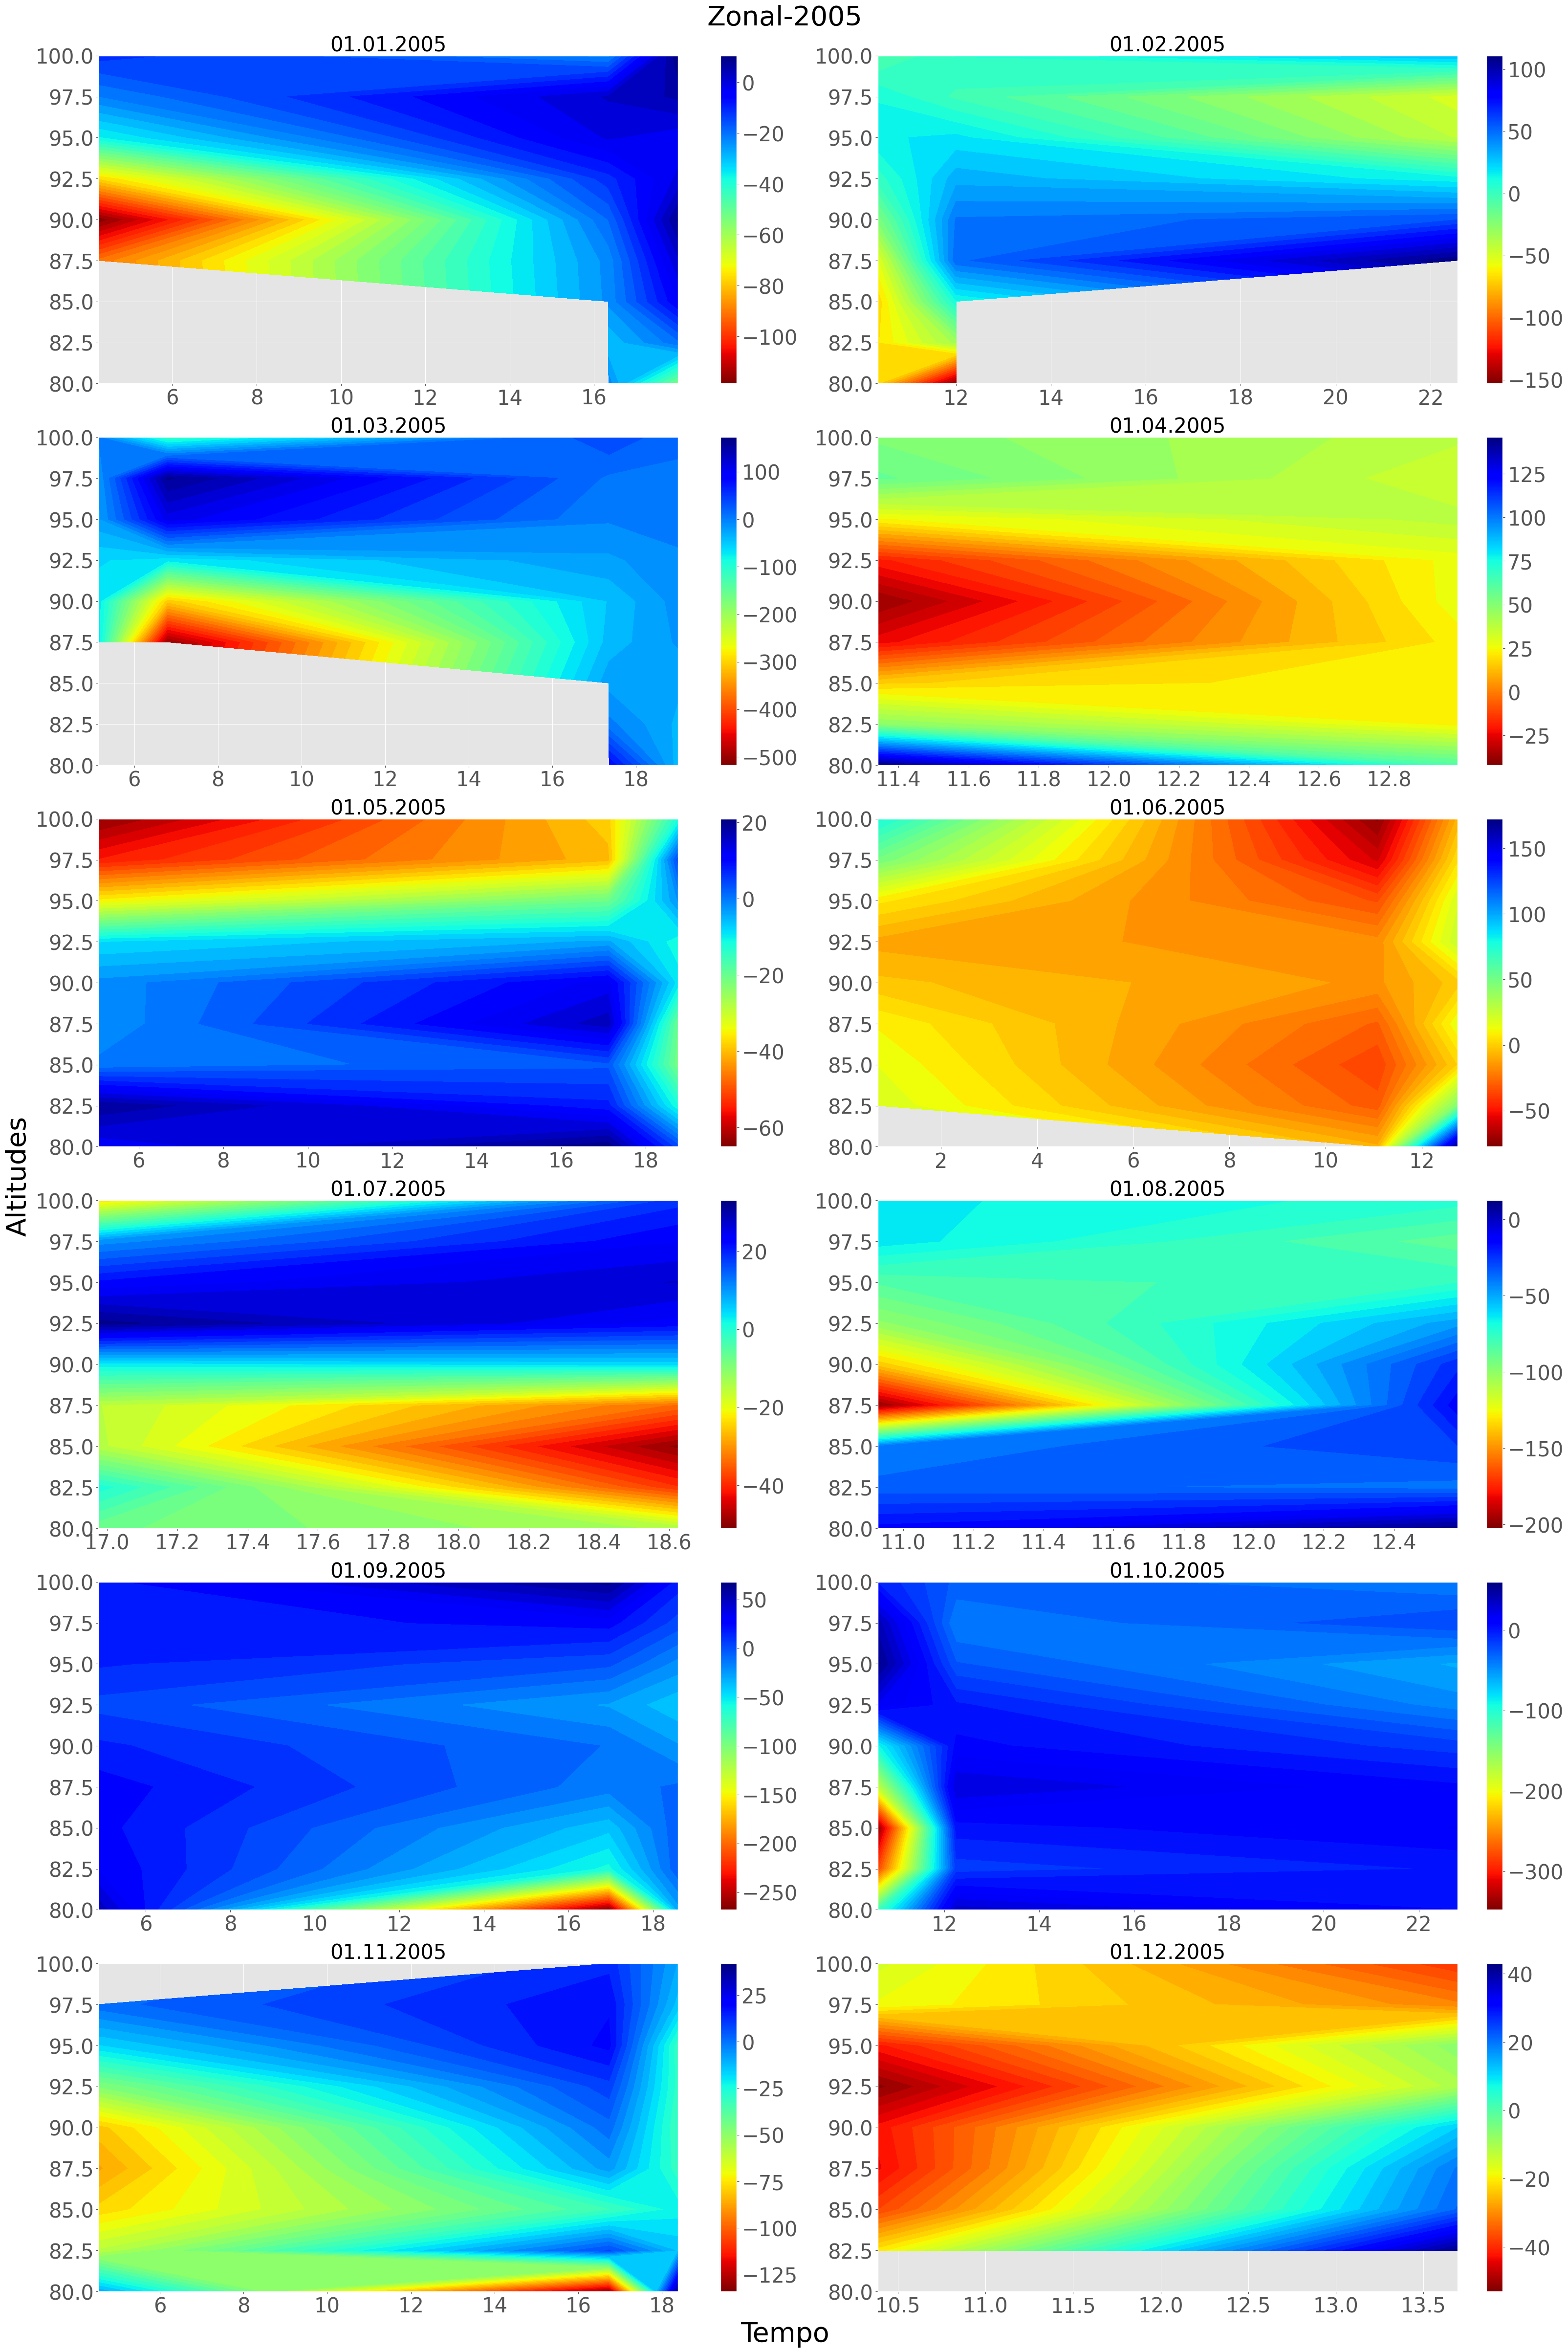

In [235]:
plot_figures("Zonal-2005", dados_zonal_2005, dict_meses, cabe)

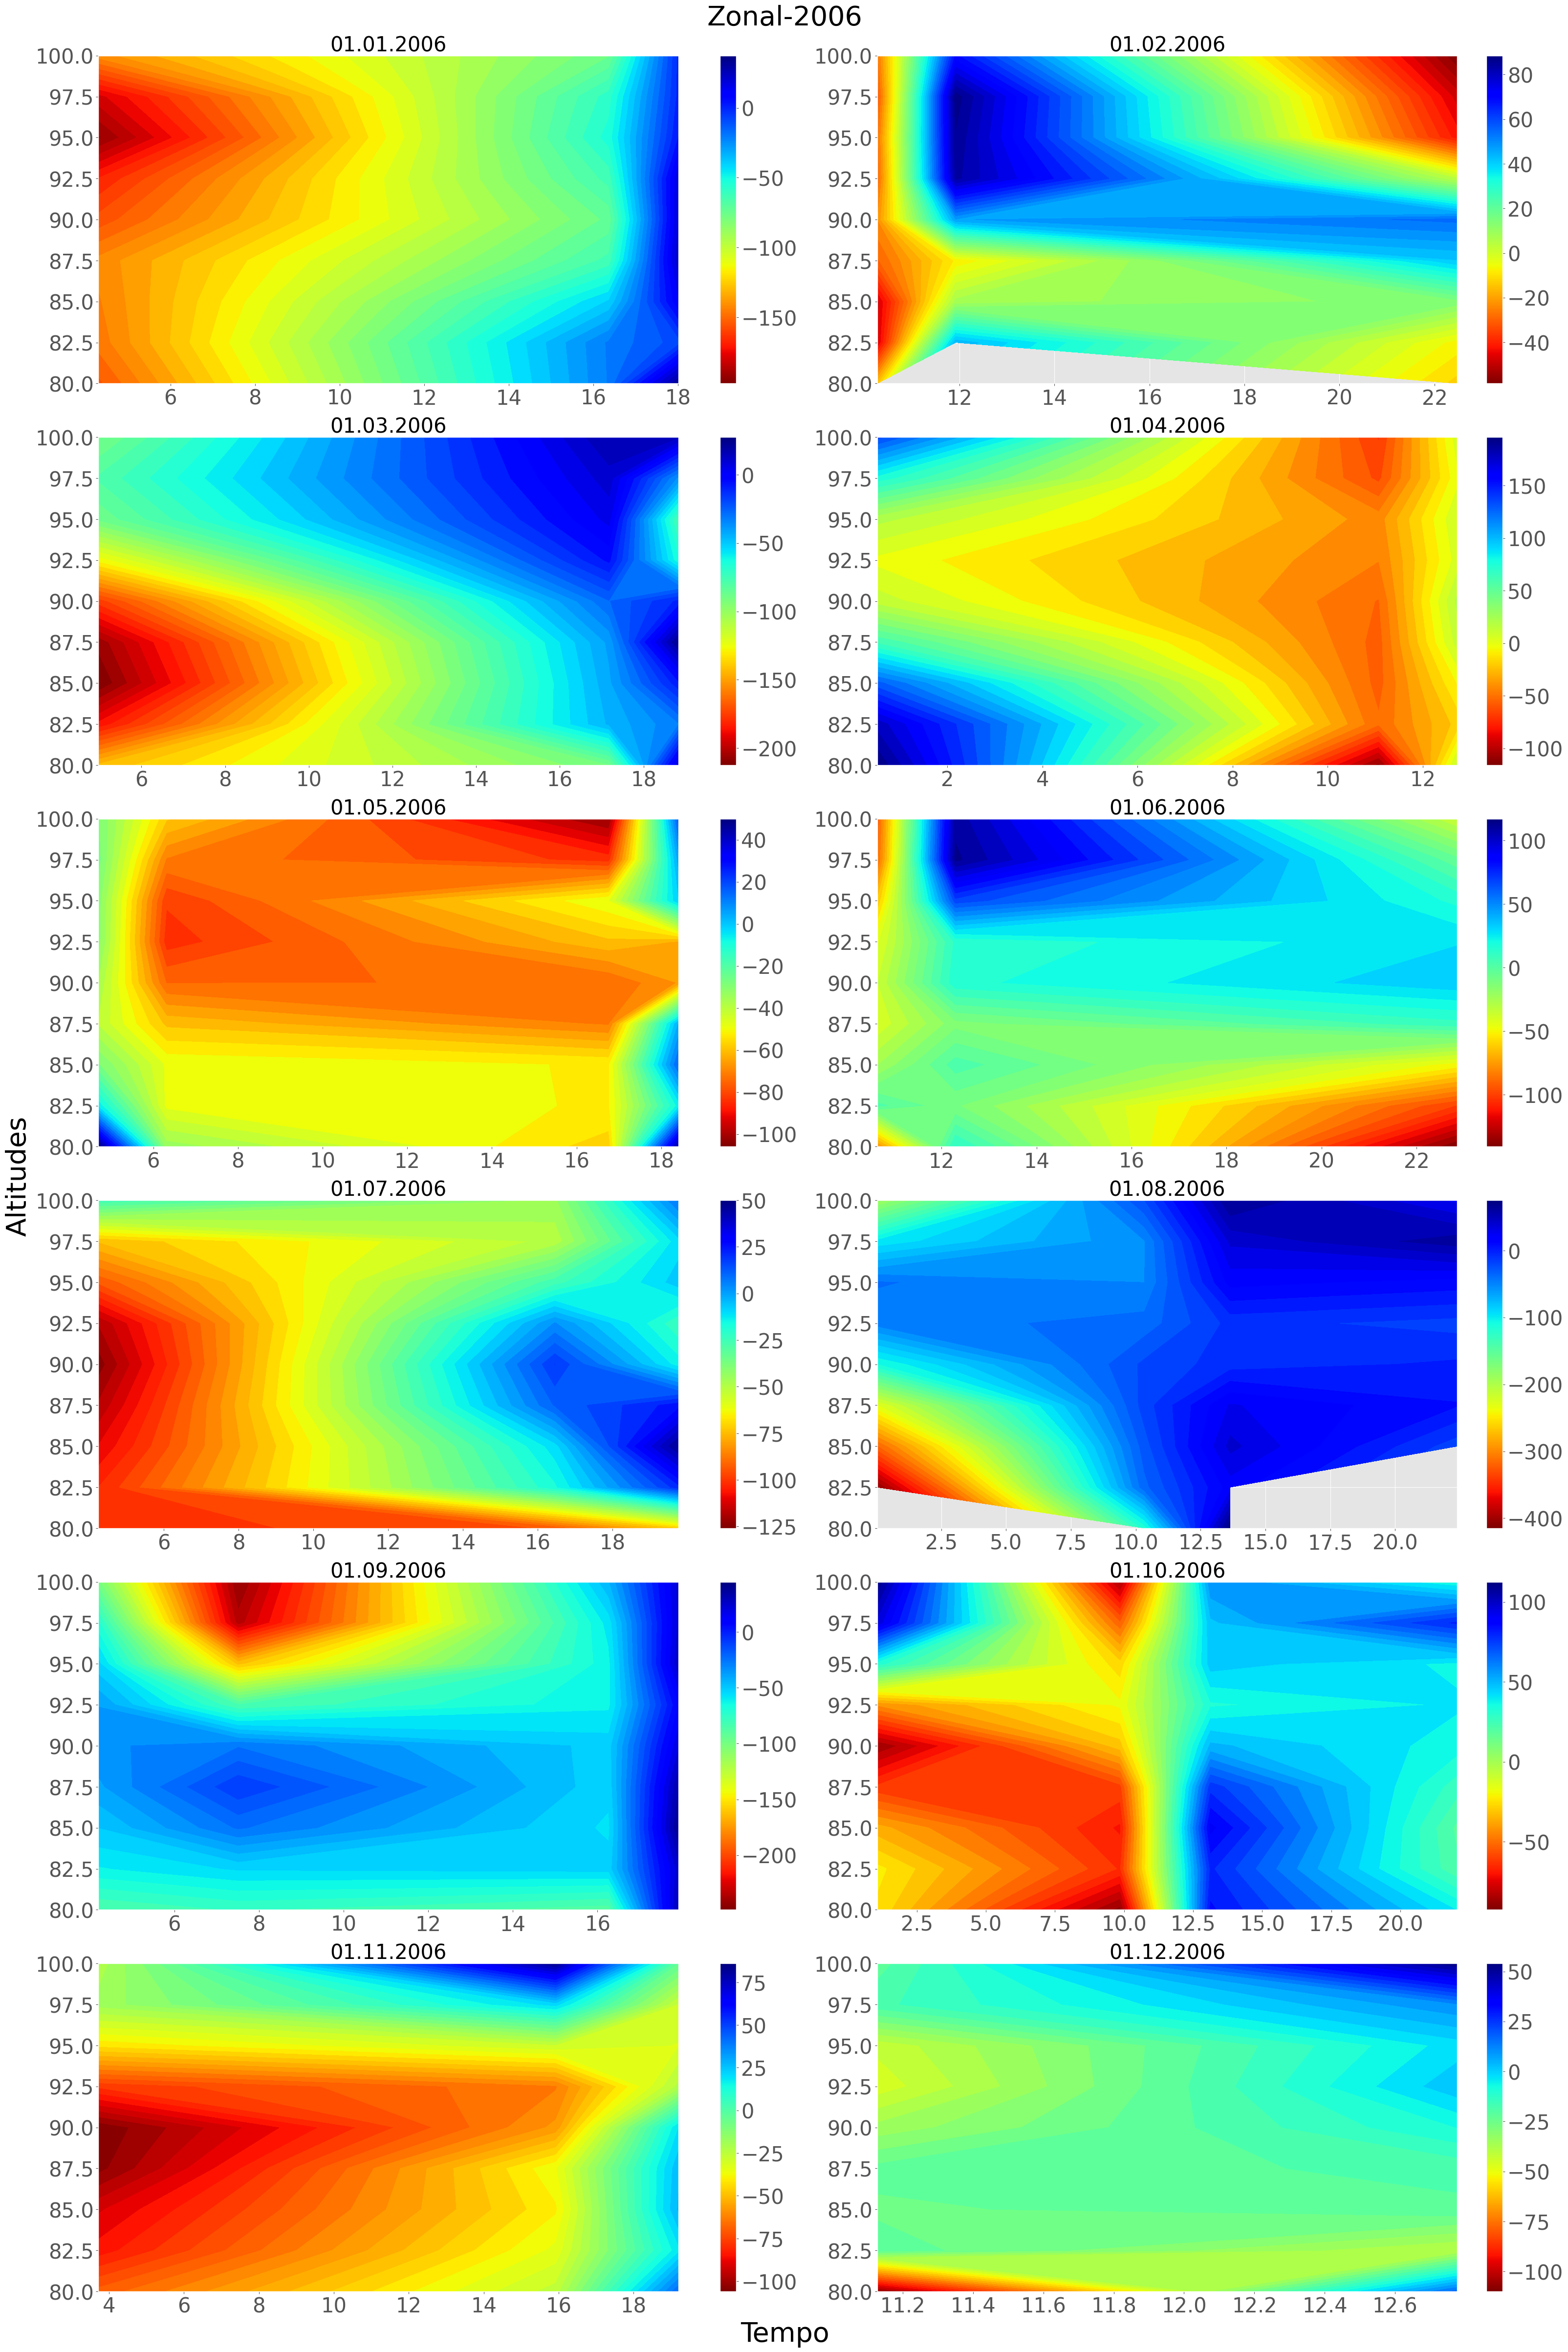

In [236]:
plot_figures("Zonal-2006", dados_zonal_2006, dict_meses, cabe)

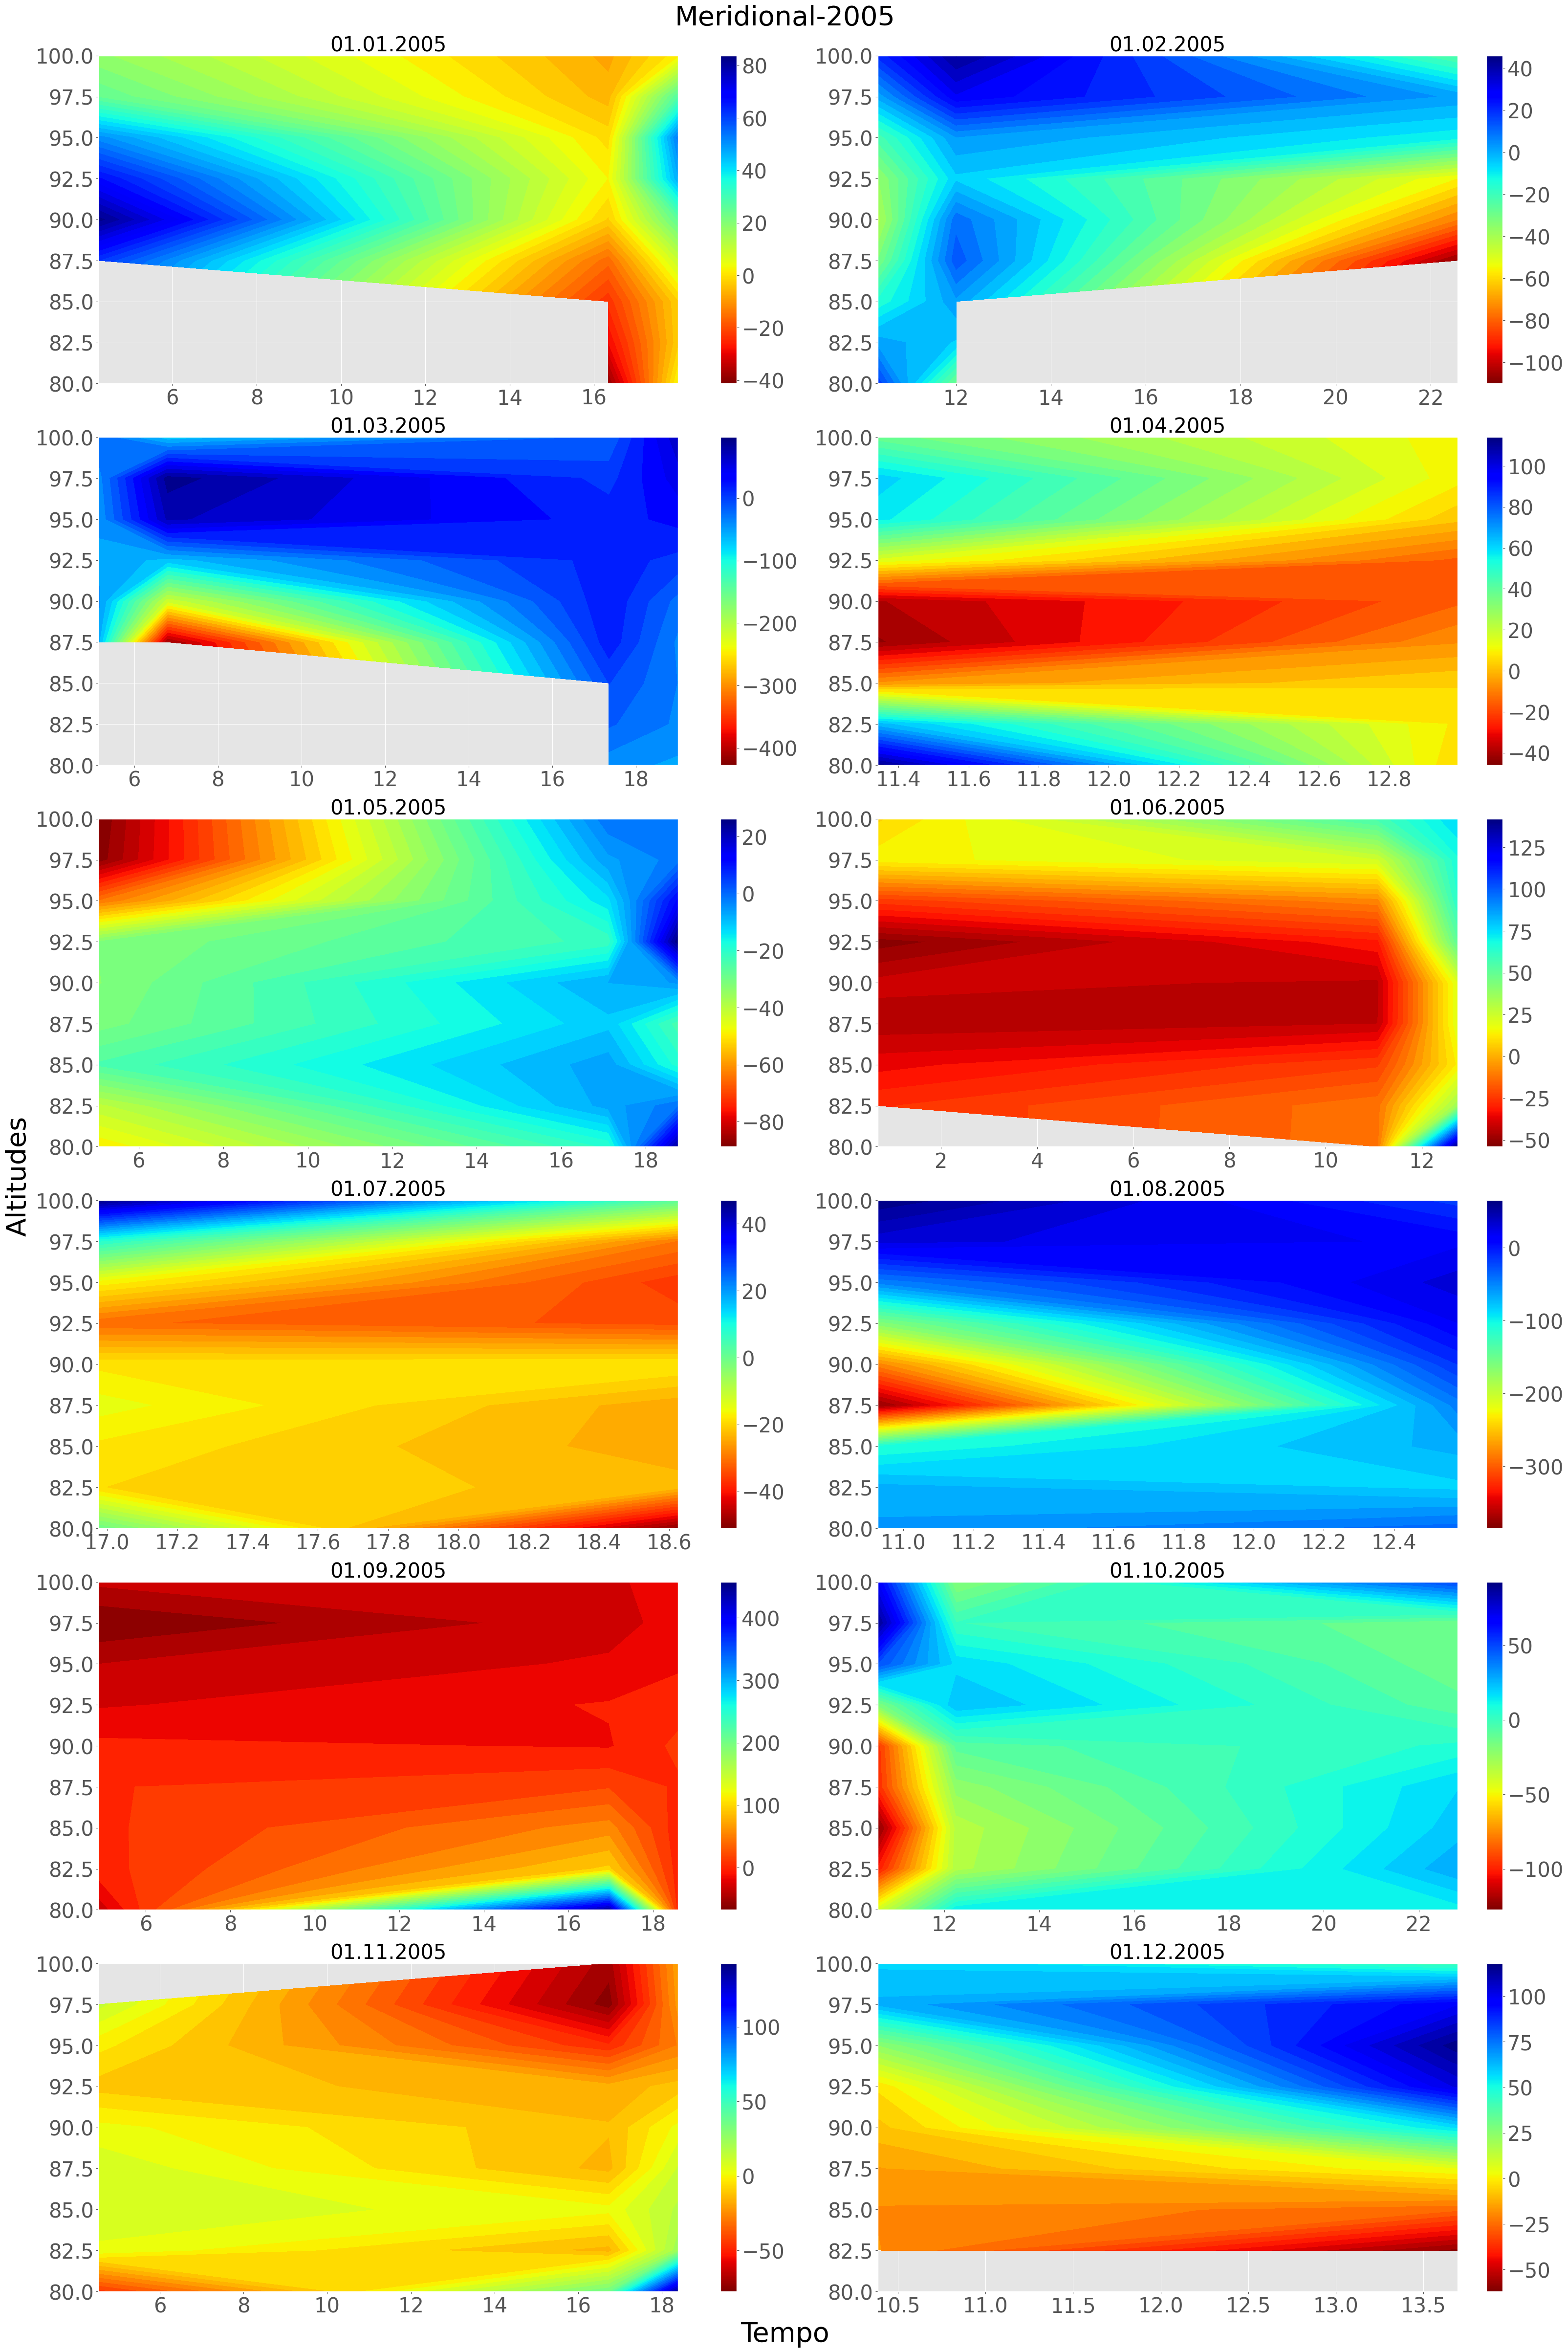

In [237]:
plot_figures("Meridional-2005", dados_meridional_2005, dict_meses, cabe)

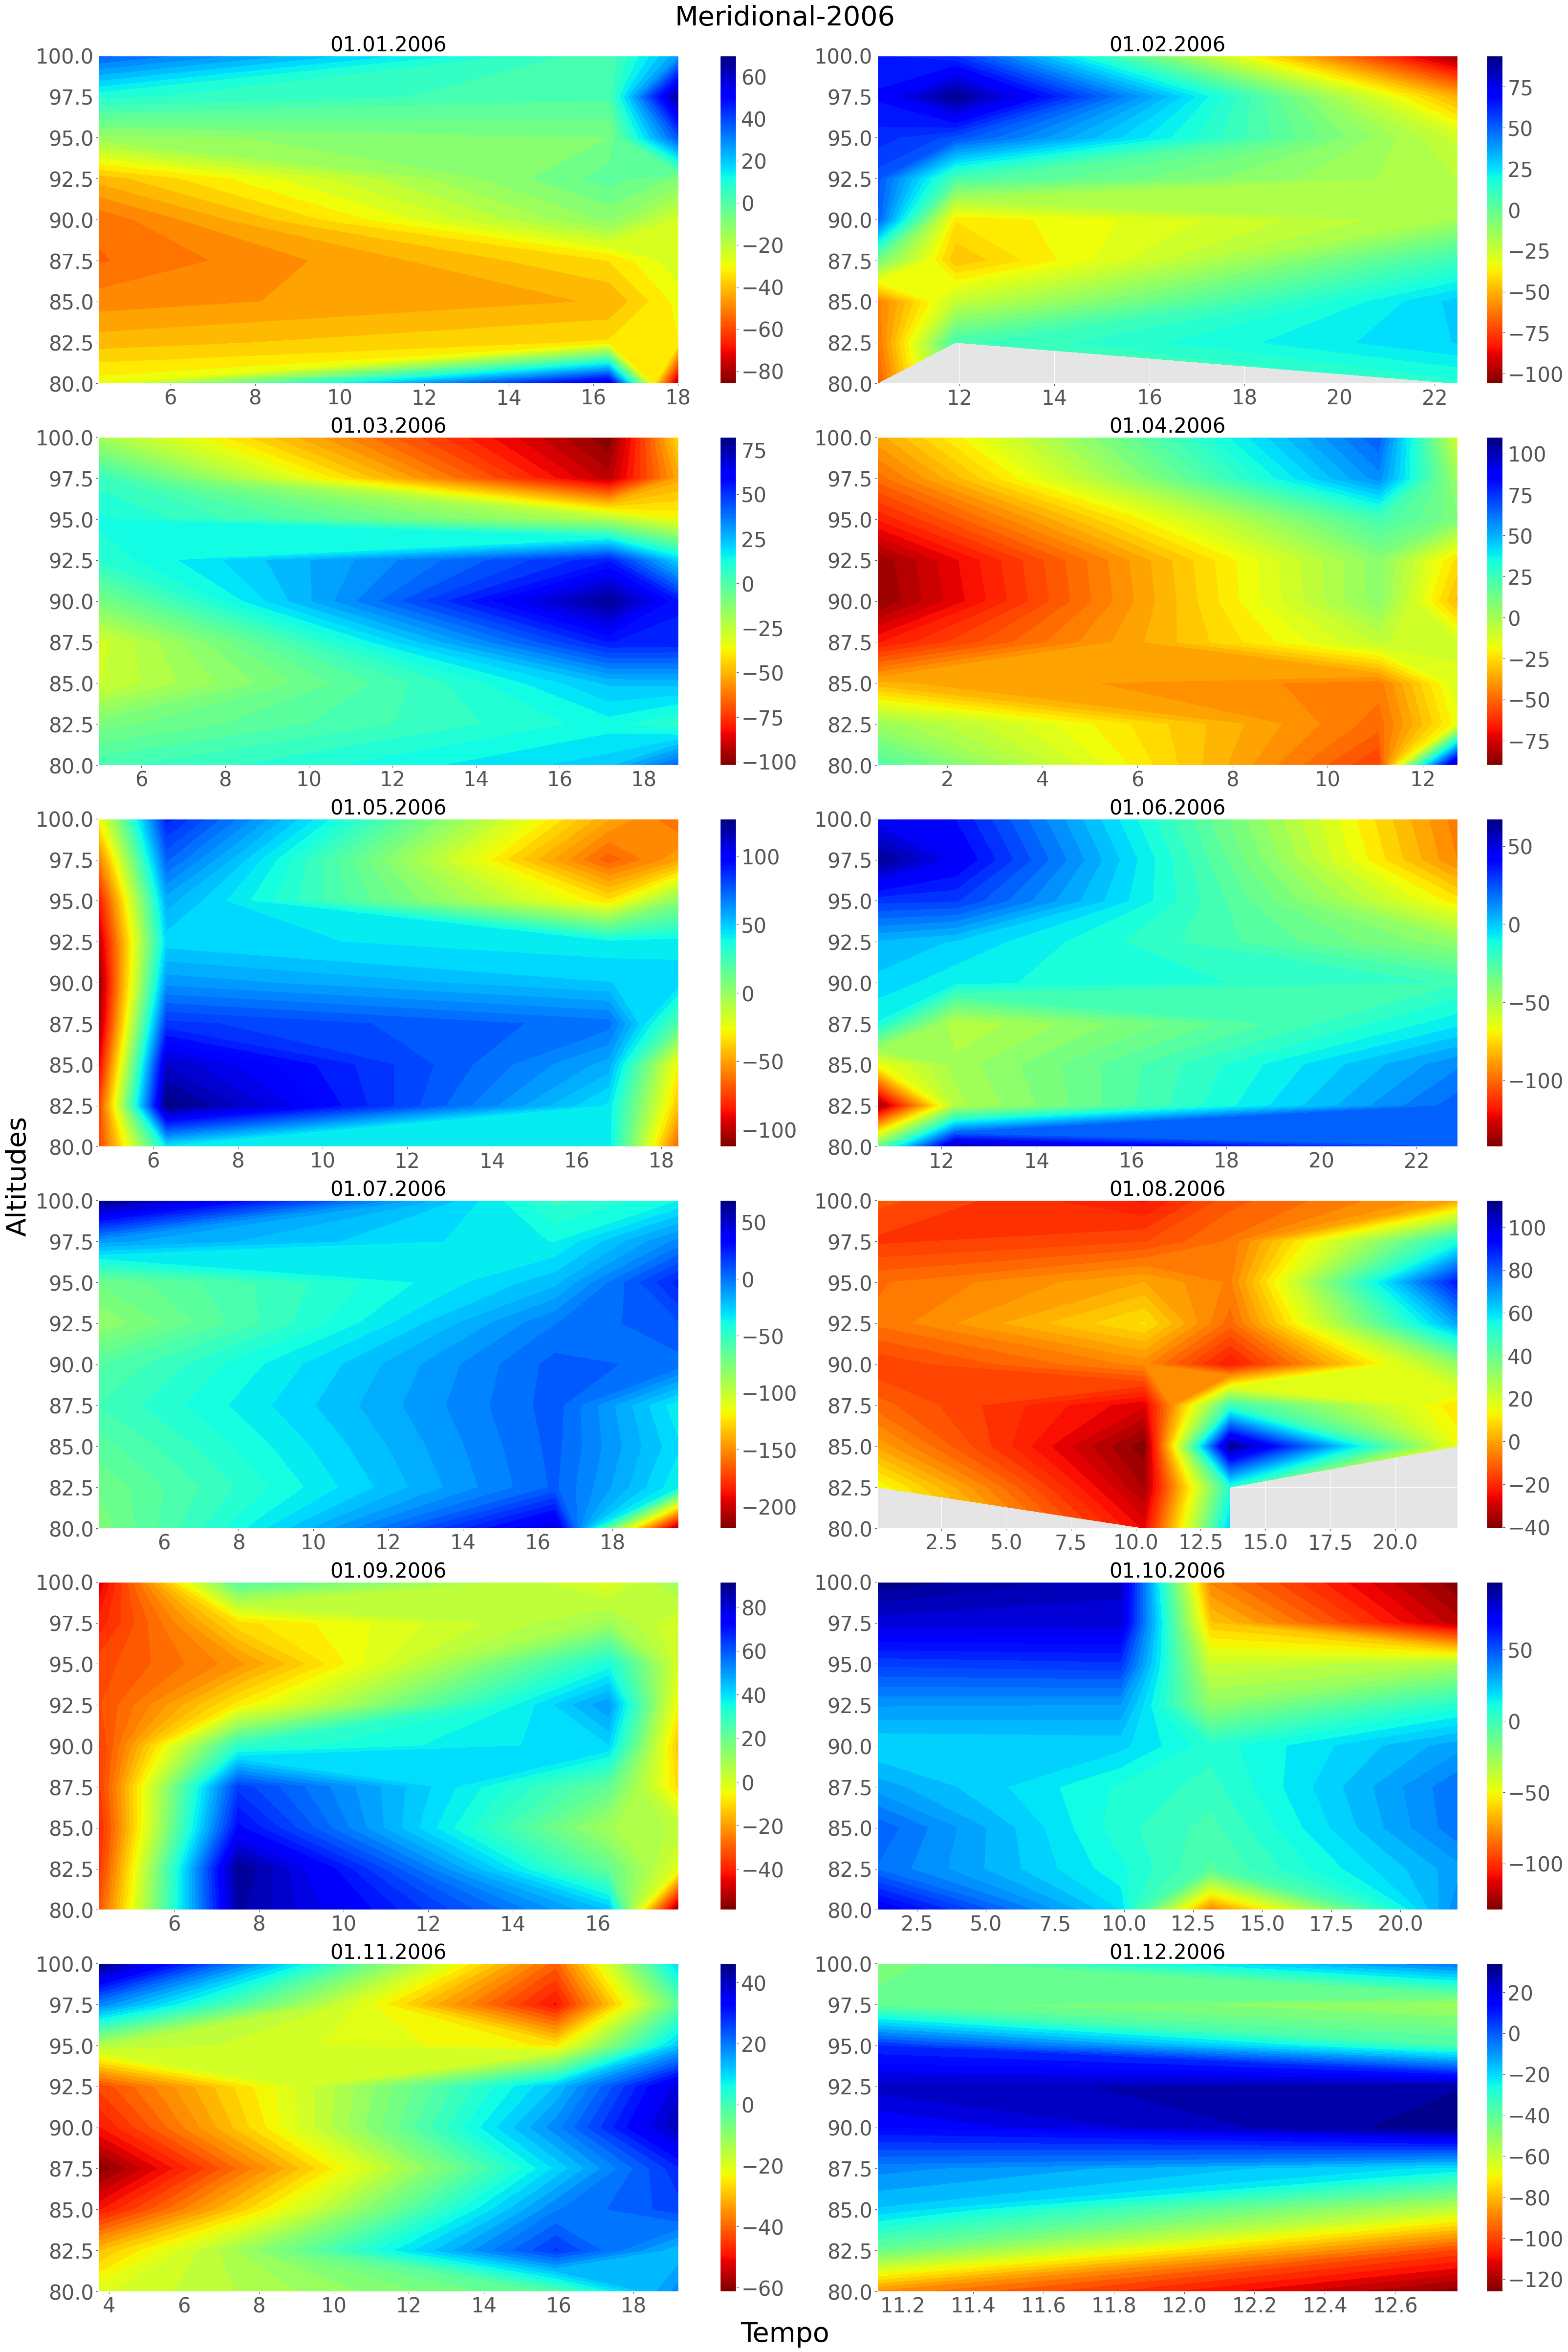

In [238]:
plot_figures("Meridional-2006", dados_meridional_2006, dict_meses, cabe)